In [54]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap

import numpy as np

In [55]:
housing = fetch_california_housing()

x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full)

In [56]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(80,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=.01))

In [58]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7111 - val_loss: 0.4544
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4597 - val_loss: 0.4155
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4308 - val_loss: 0.3780
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4127 - val_loss: 0.3640
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4013 - val_loss: 0.3614
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3901 - val_loss: 0.3548
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3836 - val_loss: 0.3470
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3750 - val_loss: 0.3486
Epoch 9/20
363/363 [==============================] - 2s 7ms/step - loss: 0.3696 - val_loss: 0.3363
Epoch 10/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3640 - val_loss: 0.3441

In [59]:
mse_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3311


(0.0, 1.0)

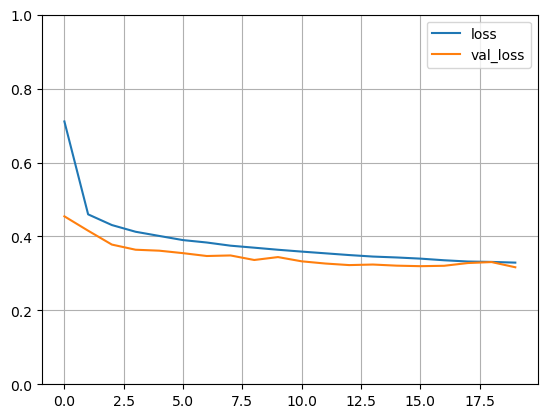

In [60]:
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)

In [61]:
model.save("regressão.h5")

In [62]:
ypred = model.predict(x_test)

162/162 [==============================] - 0s 2ms/step


In [63]:
y_test.shape

(5160,)

In [64]:
ypred.shape

(5160, 1)

In [65]:
corr_matrix = pd.DataFrame(housing.data,housing.target).corr

In [66]:
df = pd.DataFrame(data=housing.data,columns=housing.feature_names)
corr = df.corr().round(2)

<Axes: >

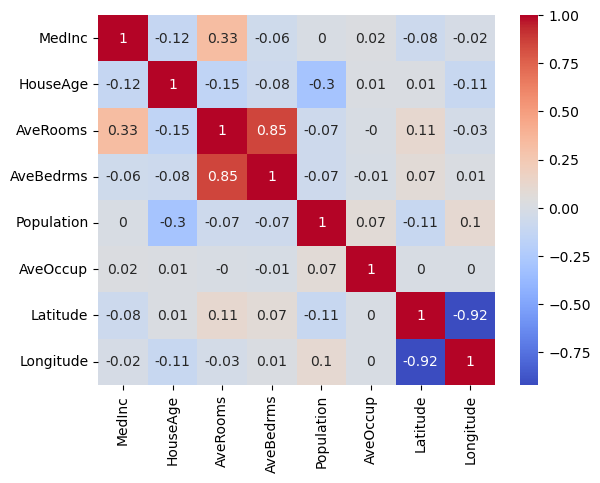

In [67]:
heatmap(corr,cmap='coolwarm',annot=True)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rmse

0.5754245991377931

In [69]:
r2_score(y_test,ypred)

0.7529063257008919